In [1]:
# Dataset link: https://www.kaggle.com/aniruddhachoudhury/esigning-of-loan-based-on-financial-history?select=financial_data.csv

In [13]:
#our task is to decide if the person is given loan or not

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("financial_data.csv")

#### Data exploration 

In [5]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [7]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [8]:
df.shape

(17908, 21)

In [10]:
df.select_dtypes("int64").columns

Index(['entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'inquiries_last_month', 'e_signed'],
      dtype='object')

In [11]:
df.select_dtypes("float64").columns

Index(['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2'],
      dtype='object')

In [12]:
df.select_dtypes("object").columns

Index(['pay_schedule'], dtype='object')

#### Dealing with the null values

In [14]:
df.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [15]:
df.columns[df.isnull().any()]

Index([], dtype='object')

#####  Encoding the categorical data 

In [16]:
df.select_dtypes("object").columns

Index(['pay_schedule'], dtype='object')

In [17]:
df["pay_schedule"].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [18]:
df["pay_schedule"].nunique()

4

In [20]:
df=pd.get_dummies(data=df,drop_first=True)

In [21]:
df.shape

(17908, 23)

In [22]:
df.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [25]:
len(df.select_dtypes(include='object').columns)

0

##### Countplot

<AxesSubplot:xlabel='e_signed', ylabel='count'>

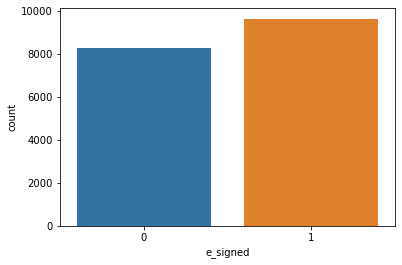

In [26]:
import warnings 
warnings.filterwarnings("ignore")
sns.countplot(df["e_signed"])

In [29]:
df[df["e_signed"]==1].shape[0]

9639

In [30]:
df.shape[0]-df[df["e_signed"]==1].shape[0]

8269

##### restructure the dataset 

In [31]:
df.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [33]:
df["months employed"]=df["months_employed"]+df["years_employed"]*12

In [34]:
df=df.drop(["months_employed","years_employed"],axis=1)

In [35]:
df.shape

(17908, 22)

In [36]:
df.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [37]:
df["personnal account months"]=df["personal_account_m"]+df["personal_account_y"]*12

In [38]:
df=df.drop(["personal_account_m","personal_account_y"],axis=1)

In [39]:
df.shape

(17908, 21)

#### Correlation matrix and heatmap

In [41]:
df2=df.drop(['entry_id', 'e_signed'],axis=1)

<AxesSubplot:>

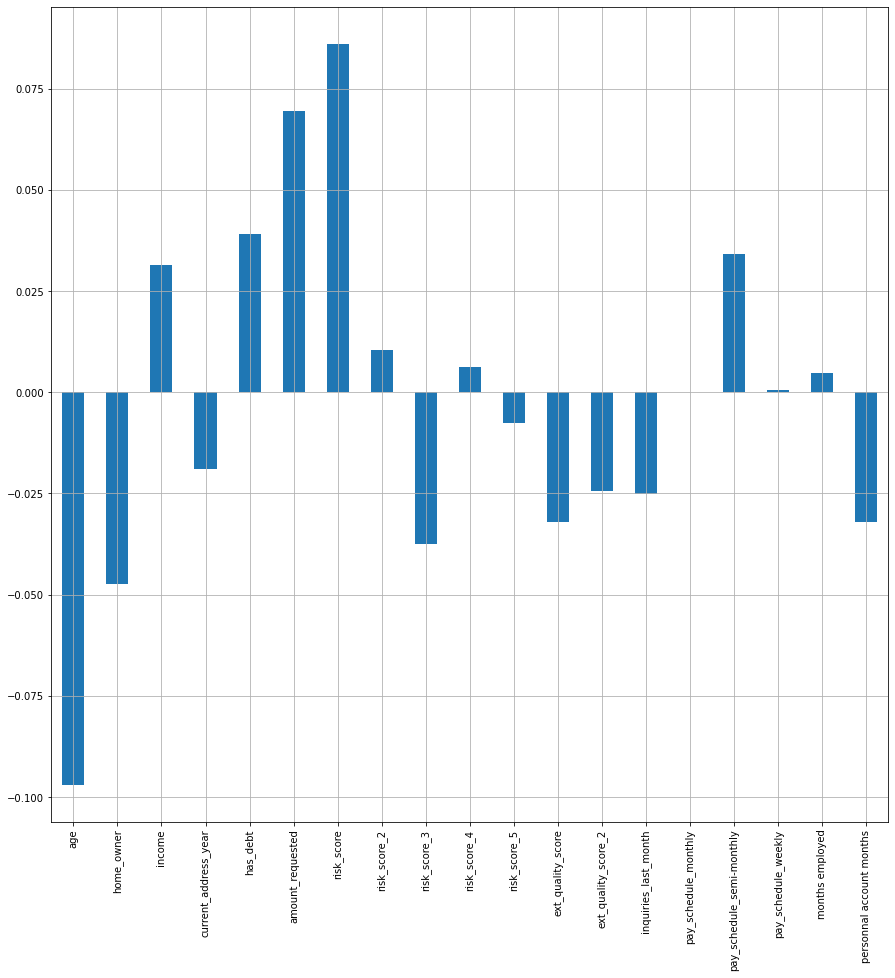

In [42]:
df2.corrwith(df["e_signed"]).plot.bar(
 figsize=(15,15),grid=True
)

<AxesSubplot:>

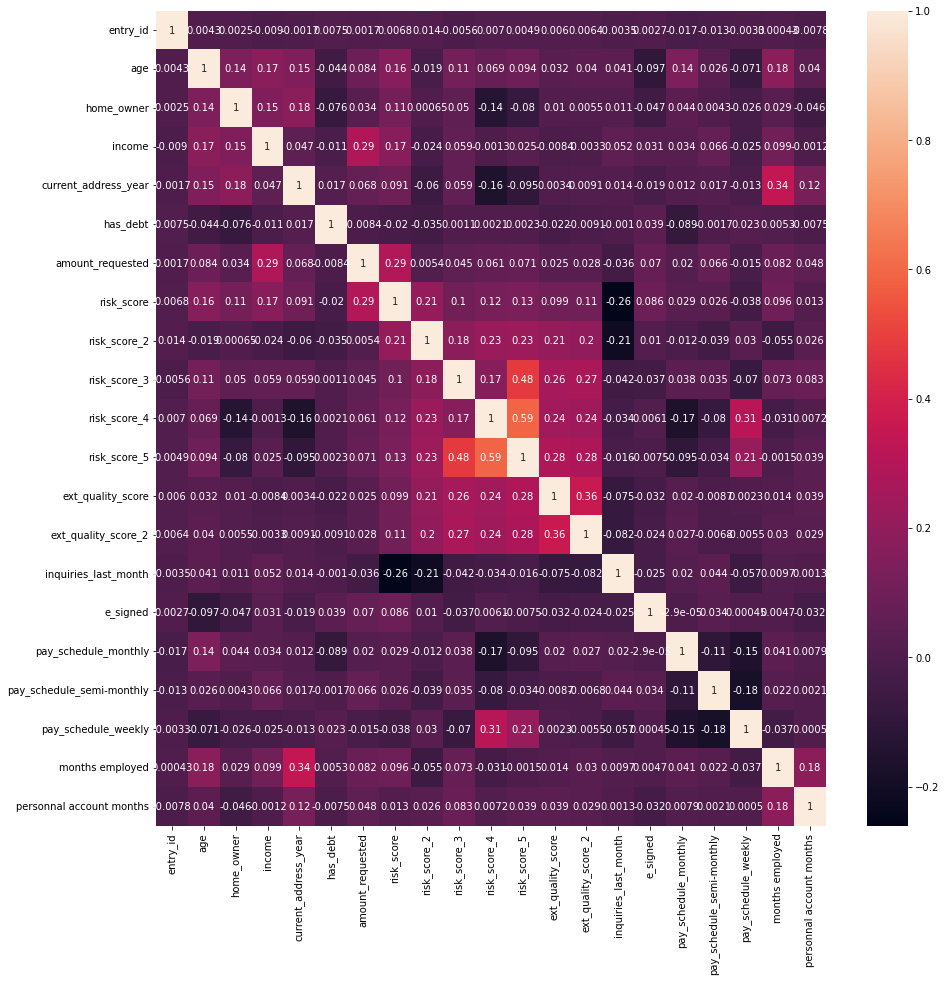

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [47]:
df.corr()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personnal account months
entry_id,1.000000,0.004333,0.002528,-0.009034,-0.001701,0.007476,0.001720,0.006780,0.013761,-0.005550,...,0.004949,0.006025,0.006392,-0.003492,0.002735,-0.017324,-0.013031,-0.003348,0.000432,-0.007839
age,0.004333,1.000000,0.142046,0.174062,0.146554,-0.043808,0.084132,0.162868,-0.019163,0.111258,...,0.093710,0.032265,0.040019,0.041224,-0.096998,0.141529,0.026439,-0.070750,0.175693,0.040405
home_owner,0.002528,0.142046,1.000000,0.147487,0.179291,-0.076206,0.033996,0.113608,0.000647,0.049708,...,-0.080470,0.010080,0.005507,0.011215,-0.047409,0.043587,0.004283,-0.025521,0.029342,-0.046213
income,-0.009034,0.174062,0.147487,1.000000,0.046982,-0.011199,0.289099,0.168375,-0.023627,0.058665,...,0.025179,-0.008429,-0.003323,0.051622,0.031377,0.034177,0.065759,-0.025361,0.099071,-0.001157
current_address_year,-0.001701,0.146554,0.179291,0.046982,1.000000,0.017423,0.067893,0.090535,-0.060412,0.058936,...,-0.094545,0.003362,0.009093,0.013659,-0.018969,0.011867,0.017395,-0.013041,0.343346,0.119105
has_debt,0.007476,-0.043808,-0.076206,-0.011199,0.017423,1.000000,-0.008445,-0.020332,-0.034691,0.001108,...,0.002341,-0.021523,-0.009055,-0.001007,0.039192,-0.088523,-0.001747,0.022986,0.005314,-0.007454
amount_requested,0.001720,0.084132,0.033996,0.289099,0.067893,-0.008445,1.000000,0.290716,0.005405,0.045465,...,0.071470,0.025167,0.028052,-0.036197,0.069572,0.019609,0.066022,-0.015255,0.081987,0.047924
risk_score,0.006780,0.162868,0.113608,0.168375,0.090535,-0.020332,0.290716,1.000000,0.208188,0.104861,...,0.130464,0.098649,0.108170,-0.261076,0.086098,0.028606,0.026159,-0.038039,0.096245,0.013017
risk_score_2,0.013761,-0.019163,0.000647,-0.023627,-0.060412,-0.034691,0.005405,0.208188,1.000000,0.184249,...,0.227510,0.207386,0.200195,-0.214013,0.010473,-0.012258,-0.038701,0.030194,-0.054721,0.025542
risk_score_3,-0.005550,0.111258,0.049708,0.058665,0.058936,0.001108,0.045465,0.104861,0.184249,1.000000,...,0.480369,0.256866,0.267931,-0.042011,-0.037483,0.038136,0.035344,-0.070332,0.073461,0.082662


### Splitting the dataset

In [50]:
x = df.drop(columns=['entry_id', 'e_signed']).values

In [51]:
y=df["e_signed"].values

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [53]:
x_train.shape

(14326, 19)

In [54]:
y_train.shape

(14326,)

In [55]:
x_test.shape

(3582, 19)

In [56]:
y_test.shape

(3582,)

### Feature scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
x_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

In [60]:
x_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.50586115,
        -1.18309754, -0.32423091],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.50586115,
        -0.28443207,  0.19566597],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50586115,
         2.86089705, -0.84412778],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.50586115,
         1.06356612,  0.36896493],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.50586115,
         0.61423339,  0.19566597],
       [-0.08997442, -0.85634884, -0.72176785, ...,  1.97682704,
        -0.28443207,  1.75535659]])

#### Building the model 

#####  Logistic regression 

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf=LogisticRegression()

In [63]:
clf.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred = clf.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [66]:
accuracy_score(y_test, y_pred)

0.5628140703517588

In [67]:
confusion_matrix(y_test, y_pred)

array([[ 654, 1000],
       [ 566, 1362]], dtype=int64)

#### SVM

In [68]:
from sklearn.svm import SVC

In [69]:
svc=SVC(random_state=0)

In [70]:
svc.fit(x_train,y_train)

SVC(random_state=0)

In [72]:
y_pred = svc.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.5946398659966499

In [74]:
confusion_matrix(y_test, y_pred)

array([[ 797,  857],
       [ 595, 1333]], dtype=int64)

#### Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [76]:
y_pred = rfc.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.6323283082077052

In [78]:
confusion_matrix(y_test, y_pred)

array([[ 959,  695],
       [ 622, 1306]], dtype=int64)

#### XGBoost Classifier 

In [79]:
from xgboost import XGBClassifier

In [80]:
xgb=XGBClassifier(random_state=0)

In [81]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [82]:
y_pred=xgb.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.628140703517588

In [84]:
confusion_matrix(y_test, y_pred)

array([[ 948,  706],
       [ 626, 1302]], dtype=int64)

In [ ]:
#best classifier is xgboost

### Hyper tuning to find best params 

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
params={
   'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.00, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7],
    'n_estimators':[100, 200, 500],
    'subsample':[0.5, 0.7, 1.0] 
}

In [87]:
rsc=RandomizedSearchCV(xgb,param_distributions=params,cv=10,scoring="roc_auc",n_iter=5)

In [89]:
rsc.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256...
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=

In [93]:
rsc.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
rsc.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [95]:
rsc.best_score_

0.7010744846980341

#### Final model (XGBoost Classifier)

In [96]:
from xgboost import XGBClassifier

In [103]:
import warnings 
warnings.filterwarnings("ignore")
classifier = XGBClassifier(subsample= 1.0,n_estimators= 200,min_child_weight= 3,max_depth= 5,learning_rate= 0.05,gamma= 0.2,colsample_bytree= 0.7)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [104]:
y_pred = classifier.predict(x_test)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.6353992183137912

In [106]:
confusion_matrix(y_test, y_pred)

array([[ 933,  721],
       [ 585, 1343]], dtype=int64)

##### Predicting a single observation 

In [107]:
df.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personnal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [108]:
single_obs = [[45, 1, 2500,3,1,600,37000,0.7373, 0.9035, 0.4877, 0.515977, 0.580918, 0.380918, 10, 0, 0, 0, 36, 30]]

In [109]:
classifier.predict(sc.transform(single_obs))

array([0])